In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import neattext as ntx
import os
import emoji
import contractions

In [5]:
df = pd.read_csv('IRMiDis-2022\\2022\\symptoms_train.csv',encoding = "utf-8")
df.head(10)

,id,tweet,labels
0,1322367936405921794,uh oh the coughs have started covid is taking ...,non-reporting
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",non-reporting
2,1324014644931878912,"""AI is being used to distinguish between asymp...",non-reporting
3,1313660639097823232,i was v ill for the last couple of days (high ...,non-reporting
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,third-party
5,1272157075045601280,can’t cough or sneeze round Khaza he gone swea...,non-reporting
6,1249033188707532801,Anyone else get a random headache and think th...,non-reporting
7,1320042195756396550,@TheRickWilson @HuffPostPol Why are Lindsey's ...,non-reporting
8,1240237555091755018,"@snootgirl So, the fever is automatic corona, ...",non-reporting
9,1275473451982168071,@davydine_david Yes mate still very sick thoug...,primary


In [3]:
df.shape

(1574, 3)

In [6]:
classes = df['labels'].unique()
val = df.groupby(['labels']).count()

In [7]:
val['tweet']

,id,tweet
labels,,
non-reporting,814,814
primary,437,437
secondary,127,127
third-party,196,196


In [7]:
classes

array(['non-reporting', 'third-party', 'primary', 'secondary'],
      dtype=object)

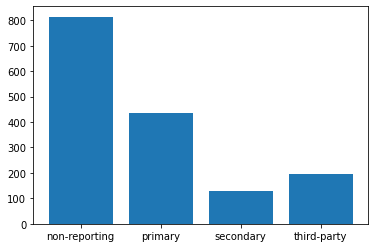

In [9]:
plt.bar(['non-reporting', 'primary','secondary','third-party'], val['tweet'])
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

In [11]:
!pip install -U imbalanced-learn

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
 
def stopWords(clean_tweet):
    tweet = " ".join(word for word in clean_tweet.split() if word not in stopwords.words('english') )
    return tweet
def clean_tweet_func(X_res_us):
    clean_tweet = [ntx.remove_urls(str(i)) for i in X_res_us] 
    clean_tweet = [ntx.remove_userhandles(str(i)) for i in clean_tweet] 
    clean_tweet = [contractions.fix(str(i)) for i in clean_tweet] 
    clean_tweet = [ntx.remove_special_characters(str(i)) for i in clean_tweet] 
    clean_tweet = [emoji.demojize(str(i)) for i in clean_tweet]
    clean_tweet = [stopWords(str(i)) for i in clean_tweet]
    clean_tweet = [i.lower() for i in clean_tweet]
    return clean_tweet
df['clean_tweet'] = clean_tweet_func(df['tweet'])

In [13]:
df[['tweet','clean_tweet']].head(10)

,tweet,clean_tweet
0,uh oh the coughs have started covid is taking ...,uh oh coughs started covid taking
1,"Loss of smell, confusion, strokes: Does Covid-...",loss smell confusion strokes does covid19 targ...
2,"""AI is being used to distinguish between asymp...",ai used distinguish asymptomatic covid19 cases...
3,i was v ill for the last couple of days (high ...,v ill last couple days high fever corona thoug...
4,Played warzone yesterday with a dude who caugh...,played warzone yesterday dude caught corona sw...
5,can’t cough or sneeze round Khaza he gone swea...,cannot cough sneeze round khaza gone swear got...
6,Anyone else get a random headache and think th...,anyone else get random headache think corona
7,@TheRickWilson @HuffPostPol Why are Lindsey's ...,why lindseys eyes red conjunctivitis is conjun...
8,"@snootgirl So, the fever is automatic corona, ...",so fever automatic corona testing i seen lots ...
9,@davydine_david Yes mate still very sick thoug...,yes mate still sick though got bed day high te...


In [7]:
df.tweet.iloc[100]

'I used to go "no no, the cough is not because of my smoking, it\'s just a mild cold". Now I go "don\'t worry about my cough! It\'s because I\'m a smoker!" #Covid_19 #smoking'

In [8]:
df.clean_tweet.iloc[100]

'i used go cough smoking mild cold now i go worry cough it i smoker covid19 smoking'

In [14]:
from sklearn import preprocessing
X = df['clean_tweet']
y = df['labels']
encoder = preprocessing.LabelEncoder()
encoded_y= encoder.fit_transform(y)
X = X.to_numpy()
X = X.reshape(-1, 1)

In [15]:
df['encoded_label'] = encoded_y
df[['labels','encoded_label']].head(5)
#0->non-reporting
#1->primary
#2->secondary
#3->third-party

,labels,encoded_label
0,non-reporting,0
1,non-reporting,0
2,non-reporting,0
3,non-reporting,0
4,third-party,3


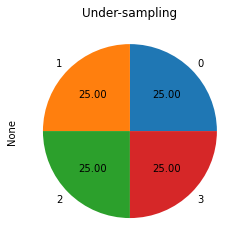

In [16]:
from imblearn.under_sampling import RandomUnderSampler
dict1 = {0:127, 2:127, 1:127, 3:127}
rus = RandomUnderSampler(sampling_strategy=dict1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res_us, y_res_us = rus.fit_resample(X,encoded_y)
y_res_us_series = pd.Series(y_res_us)
ax = y_res_us_series.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
X_res_us

In [19]:
list1 = []
for i in X_res_us:
    list1.append((' '.join([str(elem) for elem in i])))
dict2 = {'X_res_us':list1,'Labels':list(y_res_us)}
df2 = pd.DataFrame(dict2)

In [20]:
df2.head(10)

,X_res_us,Labels
0,unexpected covid19 infection symptoms include ...,0
1,fever checks flawed way flag covid19 cases exp...,0
2,went ahead took covid test precaution feeling ...,0
3,mr puneet govt could screen fever lot corona a...,0
4,what happened symptoms no wonder people sure a...,0
5,congratulations you made diarrhea trend there ...,0
6,brother coughing nurse medication want tea tis...,0
7,a similar research done chinese doctors loss t...,0
8,a thing i hate covid19 situation whenever coug...,0
9,ha pandemic land wall behold aussies panic buy...,0


In [21]:
df2 = df2.sample(frac = 1)
df2.head(10)


,X_res_us,Labels
175,me eating dairy like idiot starts coughing me ...,1
105,good point death rate cattle fever probably mu...,0
500,wh doctor extremely happy progress president t...,3
73,exactly angelina it like say right coughsneeze...,0
32,why could covid19 come better calling card lik...,0
430,someone needs take one team cough come already...,3
429,this nigga got corona live taking cough drops ...,3
372,i know someone kid goes daycare 4yrs oldand ca...,2
89,are need relief stress anxiety muscle pain hea...,0
136,yep getting real bad hay fever soon everyone g...,1


<BarContainer object of 4 artists>

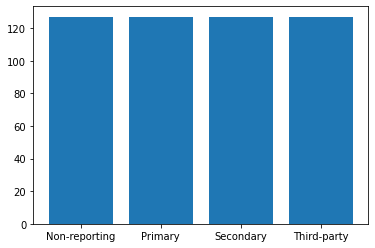

In [25]:
val = df2.groupby(['Labels']).count()
val
plt.bar(['Non-reporting','Primary','Secondary','Third-party'],val['X_res_us'])

In [27]:
vect = CountVectorizer(min_df = 2, ngram_range = (1,3)).fit(df['clean_tweet'])
X_vect_transformed = vect.transform(df2.X_res_us)

In [ ]:
print(X_vect_transformed[100].toarray().tolist())

In [109]:
labels = df2.Labels.to_numpy()

In [111]:
from sklearn.pipeline import make_pipeline

In [113]:
xgb= XGBClassifier()
xgb_cv = make_pipeline(vect,xgb)
xgb_cv.fit(df2.X_res_us,labels)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=2, ngram_range=(1, 3))),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [104]:
df.head()

,id,tweet,labels,clean_tweet,encoded_label
0,1322367936405921794,uh oh the coughs have started covid is taking ...,non-reporting,uh oh coughs started covid taking,0
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",non-reporting,loss smell confusion strokes does covid19 targ...,0
2,1324014644931878912,"""AI is being used to distinguish between asymp...",non-reporting,ai used distinguish asymptomatic covid19 cases...,0
3,1313660639097823232,i was v ill for the last couple of days (high ...,non-reporting,v ill last couple days high fever corona thoug...,0
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,third-party,played warzone yesterday dude caught corona sw...,3


In [114]:
test_tweet = []
test_labels = []
for i in df['clean_tweet']:
    if i not in X_res_us:
        test_tweet.append(i)
        test_labels.append(df[df['clean_tweet'] == i]['encoded_label'])

In [128]:
df3 = pd.read_csv("C:\\Users\\Kaustav Das\\Desktop\\Covid analysic\\covid-19-vaccination-stance-detection\\2022_test\\2022_test\\symp_test.csv")

In [116]:
df3.head(5)

,id,tweet
0,1242353332817137664t,If you think you have been exposed to COVID-19...
1,1244712715827982339t,"@timbovisser @BBCJohnBeattie Yes, myself, wife..."
2,1314693013810089984t,Lots of people I know having positive covid te...
3,1307860995692527616t,@lizzyp144 @TomAThakkar Okay but doesn’t COVID...
4,1277375421164613632t,We should have people w covid cough on white b...


In [119]:
clean_test_tweet = clean_tweet_func(df3.tweet)
pred = xgb_cv.predict(clean_test_tweet)

In [120]:
pred
#0->non-reporting
#1->primary
#2->secondary
#3->third-party

array([0, 1, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 3, 0, 0, 1, 0, 1, 2, 2, 0, 3,
       0, 1, 2, 2, 0, 2, 1, 0, 3, 1, 2, 1, 0, 0, 3, 2, 1, 3, 3, 0, 3, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 1, 3, 1, 3, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0,
       0, 0, 3, 3, 3, 2, 0, 2, 0, 0, 0, 2, 2, 3, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 0, 3, 0, 0, 1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 1, 2, 2, 2,
       0, 3, 1, 3, 1, 1, 0, 3, 0, 3, 1, 1, 1, 3, 2, 2, 2, 3, 0, 1, 2, 3,
       1, 1, 1, 2, 1, 1, 2, 1, 3, 0, 0, 2, 0, 0, 0, 2, 3, 3, 0, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 3, 3, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 3, 0, 0, 3, 3, 0, 2, 0, 0, 1, 0, 2, 2, 3, 1, 3, 3, 0, 1, 0, 1,
       1, 3, 3, 0, 3, 3, 1, 0, 0, 1, 0, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 3,
       0, 2, 1, 2, 3, 0, 2, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 3, 3, 2, 0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 2,
       2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 0, 0, 0, 1, 0, 2, 0, 0, 3,
       1, 1, 3, 2, 0, 0, 3, 0, 3, 1, 1, 0, 0, 1, 2,

In [123]:
predictions = []
for i in pred:
    if i == 0:
        predictions.append('non-reporting')
    elif i == 1:
        predictions.append('primary')
    elif i == 2:
        predictions.append('secondary')
    else:
        predictions.append('third-party')

In [131]:
df3.drop(['tweet'],inplace=True,axis =1)
df3.insert(1,'label',predictions,True)
df3.to_csv('symp_test_XGBCV.csv')

In [132]:
df3.head()

,id,label
0,1242353332817137664t,non-reporting
1,1244712715827982339t,primary
2,1314693013810089984t,non-reporting
3,1307860995692527616t,non-reporting
4,1277375421164613632t,non-reporting
